This notebook can be executed on either cpu or gpu runtime.

To run on gpu, change the
```
.to('cpu')
```
to

```
.to('gpu')
```

In [1]:
# Download nessecary libraries
!pip install datasets==2.10.0 --quiet
!pip install transformers --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.0/469.0 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 7.7 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive/')
root_dir = "./drive/MyDrive/ASR_Colab/" #change it to your own path

Mounted at /content/drive/


In [3]:
# Load the preprocessed dataet
from datasets import load_from_disk
from os import path
import numpy as np
import pandas as pd

ds_test = load_from_disk(path.join(root_dir , "dataset.hf/test"))
# ds_train = load_from_disk(path.join(root_dir , "dataset.hf/train"))

In [23]:
df_test = ds_test.to_pandas()

In [5]:
from transformers import  Wav2Vec2CTCTokenizer ,Wav2Vec2FeatureExtractor,Wav2Vec2Processor

tokenizer = Wav2Vec2CTCTokenizer(path.join(root_dir ,"vocab.json"), unk_token="[UNK]", pad_token="[PAD]", word_delimiter_token="|")
feature_extractor = Wav2Vec2FeatureExtractor(feature_size=1, sampling_rate=16000, padding_value=0.0, do_normalize=True, return_attention_mask=True)
processor = Wav2Vec2Processor(feature_extractor=feature_extractor, tokenizer=tokenizer)

In [6]:
# Load the model weights
from transformers import Wav2Vec2ForCTC
model = Wav2Vec2ForCTC.from_pretrained(path.join(root_dir ,"model_weights")).to("cpu")

In [ ]:
# select 20 random samples from the test dataset
selected_samples = np.random.randint(low = 0 , high= len(ds_test) , size=20)

In [ ]:
import torch

# Initialize empty lists to store predicted outputs and other columns
predicted = []
real_sentences = []
audios = []
gender = []
accent = []
tone = []

# Iterate through the selected samples in the test dataset
for sample in ds_test.select(selected_samples):
  model_input = processor(sample["input_values"], return_tensors="pt", padding=True,sampling_rate=16000)

  # Move the input values to GPU and obtain model predictions
  logits = model(model_input.input_values.to("cpu")).logits
  pred_ids = torch.argmax(logits, dim=-1)[0]

  # Append the predicted output, real sentence labels, and audio inputs and other columns to their respective lists
  predicted.append(pred_ids)
  real_sentences.append(sample["transcript"])
  audios.append(sample["input_values"])
  gender.append(sample["gender"])
  accent.append(sample["accent"])
  tone.append(sample["tone"])

* Display 20 sample prediction

In [ ]:
import IPython.display as ipd

dashed = "_-_-"*100

for id_sample in range(len(predicted)):
  # Display the predicted text generated by the model
  print("Prediction:")
  print(processor.decode(predicted[id_sample]))

  # Display the reference (real) text
  print("\nReference:")
  print(real_sentences[id_sample])

  # Display the audio
  print("\nAudio:")
  speech = audios[id_sample]

  # Display the audio using IPython Audio with autoplay enabled
  ipd.display(ipd.Audio(data=speech, rate=16000))

  print(f'gender: {gender[id_sample]}, accent: {accent[id_sample]}, tone: {tone[id_sample]}')
  print(dashed)

Prediction:
فند دیگی رمیخوان تعریف بکنم ویآمتوی پوشه خندها یکمانت دیگرسر میکنم پیدار کنم و سلنگهفانتی که

Reference:
فونت دیگه ایی رو میخوام تعریف بکنم بیام تو پوشهی فونتها یه فونت دیگر سعی میکنم پیدا کنم مثلا یه فونتی که 

Audio:


gender: male, accent: فارسی, tone: incomplete
_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-
Prediction:
وقتی که به خواستاید مرسی.

Reference:
وقتیکه به خواستههایت میرسی  

Audio:


gender: male, accent: فارسی, tone: incomplete
_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-
Prediction:
من با چه چیزی میتوانم کمک بکنم.

Reference:
من با چه چیزی میتوانم کمک بکنم 

Audio:


gender: male, accent: فارسی , tone: question
_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-
Prediction:
اگر میخوهید خوابهای تان تعریر شود اول باید دیدار شوید.

Reference:
اگر میخواهید خواب هایتان تعبیر شوند اول باید بیدار شوید. 

Audio:


gender: male, accent: فارسی, tone: normal
_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-
Prediction:
کاری را انجام دهید که به آن عشم میورزید و میتواند برایتان سروت آورد.

Reference:
کاری را انجام دهید که به آن عشق میورزید و میتواند برایتان ثروت آورد. 

Audio:


gender: male, accent: فارسی, tone: impreative
_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-
Prediction:
آیا استاندارتهایی که برای قظاوت درباری دیگران استفاده میکنید همان معگارهایی هستند که برای قظاوت در بارهی خودتان بهکار میبرید.

Reference:
یا استانداردهایی که برای قضاوت درباره دیگران استفاده میکنید همان معیارهایی هستند که برای قضاوت درباره خودتان به کار میبرید؟ 

Audio:


gender: female, accent: فارسی, tone: question
_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-
Prediction:
باید احساس کنی که انرژی شاخت را پر میکن د آن را گر و روشن میکنی.

Reference:
باید احساس کنی که انرژی شاخهات را پر میکند و آن را گرم و روشن میکند. 

Audio:


gender: male, accent: فارسی, tone: normal
_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-
Prediction:
با همزن دستیم مواز را به خوبی هم بزند.

Reference:
با همزن دستی مواد را به خوبی هم بزنید. 

Audio:


gender: male, accent: فارسی, tone: imperative
_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-
Prediction:
کافی است نهربان باشید.

Reference:
کافی است مهربان باشید. 

Audio:


gender: female, accent: فارسی, tone: imperative
_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-
Prediction:
گفت دلم تنگ میشود هنوز هم بد از این همه سالگاهی سدایم میکند بیشتر بین خواب و بیدارید یا وقتی جایی هستم قریب و ناآشنا وقتی بارانهای تولانی میبارد زدایم میکنند.

Reference:
. گفت دلم تنگ میشود هنوز هم بعد از این همه سال گاهی صدایم میکند بیشتر بین خواب و بیداری یا وقتی جایی هستم غریب و ناآشنا. وقتی بارانهای طولانی میبارد صدایم میکند 

Audio:


gender: female, accent: فارسی, tone: normal
_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-
Prediction:
زندگی یک معمووریت مهم است

Reference:
زندگی یک ماموریت مهم است. 

Audio:


gender: female, accent: فارسی, tone: normal
_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-
Prediction:
تو سلام کن سرگ سر دلشان بزرد.

Reference:
تو سلام کن سر به سر دل شان بگذار. 

Audio:


gender: female, accent: خراسانی, tone: imperative
_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-
Prediction:
در حدود دحسی میلادی اگیتارهای الکفریکی وارد مسیقی شدند.

Reference:
در حدود دهه ۳۰ میلادی گیتارهای الکتریکی وارد موسیقی شدند. 

Audio:


gender: female, accent: فارسی, tone: normal
_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-
Prediction:
جمان و نوجوان چشمه جوشان نیروی و استعداد است.

Reference:
جوان و نوجوان چشمه جوشان نیرو واستعداد است. 

Audio:


gender: male, accent: فارسی, tone: normal
_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-
Prediction:
در حالی که بیش از چارونی ملیار سال از عمر خرشید میگزرد در سحابی شکارچیس تارههایی ب سند کمتر اسس پظارسال بیده میشود.

Reference:
درحالیکه بیش از ۴ ٫ ۵ میلیارد سال از عمر خورشید میگذرد در سحابی شکارچی ستارههایی با سن کمتر از ۳۰۰ هزار سال دیده میشوند 

Audio:


gender: male, accent: فارسی, tone: normal
_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-
Prediction:
من اجرا میگیرم این رو و در فسل ده اینجا خودش چی شده زاهر شد

Reference:
من اجرا میگیرم این رو و در فصل دو اینجا خودش چی شده ظاهر شد 

Audio:


gender: male, accent: فارسی, tone: normal
_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-
Prediction:
این دوزبان بر خاسته از ناهیهی باستانی

Reference:
این دو زبان برخاسته از ناحیه باستانی 

Audio:


gender: male, accent: فارسی, tone: incomplete
_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-
Prediction:
تداد جبیتی بخته را بلاکه شهری بودن آن لخت میدانند.

Reference:
تعداد جمعیت یک نقطه را ملاک شهری بودن ان نقطه میدانند. 

Audio:


gender: male, accent: فارسی, tone: normal
_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-
Prediction:
گوی مشاعرهای م عنایا میآمنشان در گرفتهبو و هر کدام از زنم خود مکلم درونیاش را و سینه بیرون ریخ و جم را به هیجان وامیداشت.

Reference:
گویی مشاعرهای معنادار میان شان در گرفته بود و هر کدام از ظن خود مکنون درونیاش را از سینه بیرون میریخت و جمع را به هیجان وا میداشت. 

Audio:


gender: male, accent: فارسی, tone: normal
_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-
Prediction:
تال نمیتوان از قشخاب چینی و کازه به دستگی استفراده نمود.

Reference:
مثال نمیتوان از پشقاب چینی و کاسه پلاستیکی استفاده نمود 

Audio:


gender: male, accent: فارسی, tone: normal
_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-


In [ ]:
# predicted_sentences = []

# for sample in ds_test:
#   model_input = processor(sample["input_values"], return_tensors="pt", padding=True,sampling_rate=16000)
#   logits = model(model_input.input_values.to("cpu")).logits
#   pred_ids = torch.argmax(logits, dim=-1)[0]
#   predicted_sentences.append(processor.decode(pred_ids))

In [ ]:
!pip install evaluate
!pip install jiwer

In [36]:
from torch.utils.data import DataLoader

test_loader = DataLoader(df_test, batch_size=32)

In [32]:
import torch
import evaluate

wer_metric = evaluate.load("wer")

def evaluate_wer_per_sample(model, processor, data_loader):
    model.eval()
    results = []

    with torch.no_grad():
        for batch in data_loader:
            inputs = processor(batch["input_values"], return_tensors="pt", padding=True, sampling_rate=16000)
            input_values = inputs.input_values.to(model.device)
            attention_mask = inputs.attention_mask.to(model.device)

            logits = model(input_values, attention_mask=attention_mask).logits
            preds = torch.argmax(logits, dim=-1)

            pred_str = processor.batch_decode(preds)
            label_str = [label.lower() for label in batch["labels"]]

            for i in range(len(pred_str)):
                sample_wer = evaluate.compute(predictions=[pred_str[i]], references=[label_str[i]])
                results.append({
                    "Reference": batch["transcript"][i],
                    "Predicted": pred_str[i],
                    "Accent": batch["accent"][i],
                    "Gender": batch["gender"][i],
                    "Tone": batch["tone"][i],
                    "WER": sample_wer[0],
                })

    return results

In [ ]:
results = evaluate_wer_per_sample(model, processor, test_loader)
df = pd.DataFrame(results)

In [ ]:
# save dataset
df.to_excel('WER.xlsx')

In [72]:
# load dataset
df = pd.read_excel('WER.xlsx')

In [73]:
print(df.Tone.unique())
tone = df['Tone']
tone.replace(['normal ', 'nortmal', 'nomal', 'Normal'], 'normal', inplace=True)
tone.replace(['Question', 'quenstion', 'question ', 'question/incomplete'], 'question', inplace=True)
tone.replace(['incomplete ', 'incomplet'], 'incomplete', inplace=True)
tone.replace(['exclamatory ', 'exclamative'], 'exclamatory', inplace=True)
tone.replace(['impreative', 'imperative '], 'imperative', inplace=True)
print(df.Tone.unique())

['question' 'normal' 'imperative' 'incomplete' 'exclamatory' 'normal '
 'question ' 'imperative ' 'exclamatory ' 'incomplet' 'Normal' 'Question'
 'nomal' 'question/incomplete' 'incomplete ' 'exclamative' 'quenstion'
 'nortmal' 'impreative']
['question' 'normal' 'imperative' 'incomplete' 'exclamatory']


In [74]:
print(df.Accent.unique())
accent = df['Accent']
accent.replace(['فارسی ', 'farsi'], 'فارسی', inplace=True)
print(df.Accent.unique())

['فارسی' 'شیرازی' 'farsi' 'فارسی ' 'ترکی' 'خراسانی' 'یزدی']
['فارسی' 'شیرازی' 'ترکی' 'خراسانی' 'یزدی']


In [58]:
df.head()

Reference  \
0                      چرا این‌‌‌‌طور فکر می‌‌‌‌کنی؟   
1    همیشه من و تو راجع به آن با هم صحبت کرده‌‌‌‌ایم   
2             دنیا در حال گذار به‌‌‌‌سمت پایداری است   
3   شاخصی که باید عملکرد تسلا را با آن اندازه بگیریم   
4  باید تعداد واقعاً غیرقابل‌‌‌‌تصوری باتری تولید...   

                                          Predicted Accent Gender      Tone  \
0                              چرا اینطور فکر میکنم  فارسی   male  question   
1                 همیشه منو تو راجع به آن صحبت کردی  فارسی   male    normal   
2               دنیا در حال گذار به سمت پایداری است  فارسی   male    normal   
3   شوخسی که باید عملکرد تصرا را با آن اندازه بگیرم  فارسی   male    normal   
4  باید تعداد واقعا غیر قابل تصوری باتری دولید کنیم  فارسی   male    normal   

                                                Path       WER  
0  /content/content/dataset/trimmed_voices/voice_...  0.500000  
1  /content/content/dataset/trimmed_voices/voice_...  0.454545  
2  /content/content/dataset/trimmed_voices/voice_...  0.285714  
3  /content/content/dataset/trimmed_voices/voice_...  0.300000  
4  /content/content/dataset/trimmed_voices/voice_...  0.714286

In [104]:
from sklearn.preprocessing import LabelEncoder

le_gender = LabelEncoder()
df['Gender'] = le_gender.fit_transform(df['Gender'])
le_tone = LabelEncoder()
df['Tone'] = le_tone.fit_transform(df['Tone'])
le_accent = LabelEncoder()
df['Accent'] = le_accent.fit_transform(df['Accent'])

<ipython-input-106-fca395105e20>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr(method='spearman')


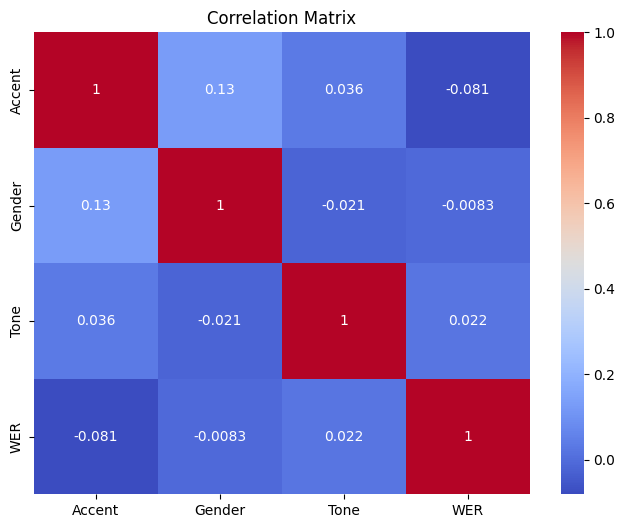

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = df.corr(method='spearman')

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [90]:
import scipy.stats as stats

correlation, p_value = stats.pointbiserialr(df['Gender'], df['WER'])
print(f"Correlation between WER and Gender: {correlation:0.3f}, P-value: {p_value:0.3f}")

correlation, p_value = stats.pointbiserialr(df['Tone'], df['WER'])
print(f"Correlation between WER and Tone:   {correlation:0.3f}, P-value: {p_value:0.3f}")

correlation, p_value = stats.pointbiserialr(df['Accent'], df['WER'])
print(f"Correlation between WER and Accent: {correlation:0.3f}, P-value: {p_value:0.3f}")

Correlation between WER and Gender: -0.016, P-value: 0.223
Correlation between WER and Tone:   0.027, P-value: 0.035
Correlation between WER and Accent: -0.064, P-value: 0.000


In [91]:
df['Gender'] = le_gender.inverse_transform(df['Gender'])
df['Tone'] = le_tone.inverse_transform(df['Tone'])
df['Accent'] = le_accent.inverse_transform(df['Accent'])

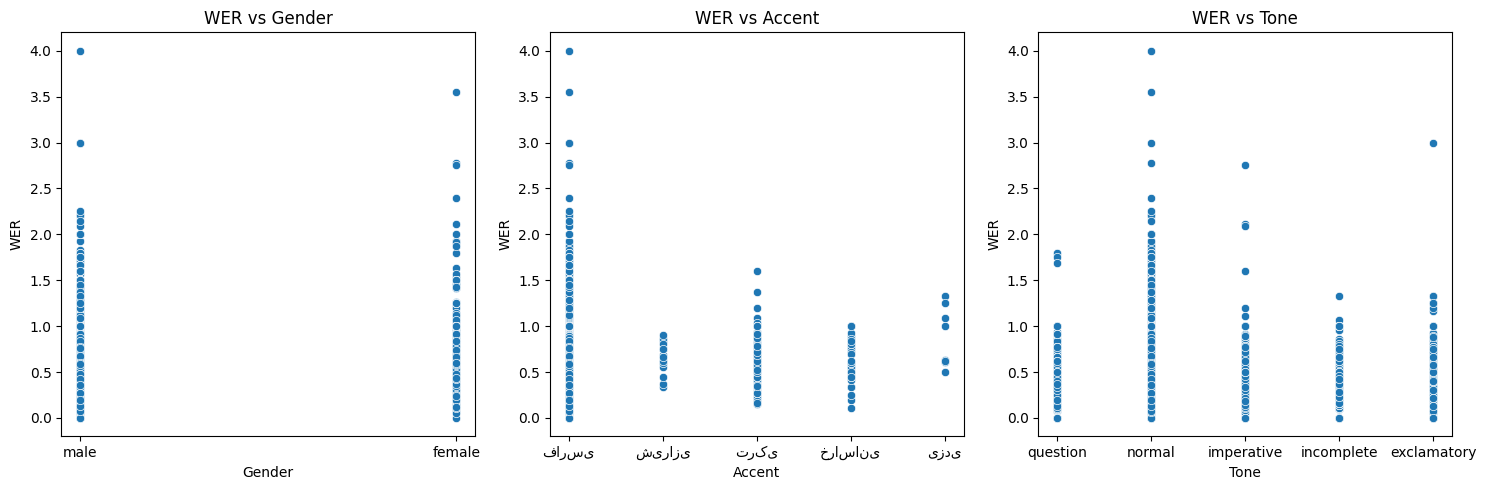

In [101]:
# Plotting scatter plots between WER and each feature
plt.figure(figsize=(15, 5))

# Scatter plot for WER vs Gender
plt.subplot(1, 3, 1)
sns.scatterplot(data=df, x='Gender', y='WER')
plt.title("WER vs Gender")
plt.xlabel("Gender")
plt.ylabel("WER")

# Scatter plot for WER vs Accent
plt.subplot(1, 3, 2)
sns.scatterplot(data=df, x='Accent', y='WER')
plt.title("WER vs Accent")
plt.xlabel("Accent")
plt.ylabel("WER")

# Scatter plot for WER vs Tone
plt.subplot(1, 3, 3)
sns.scatterplot(data=df, x='Tone', y='WER')
plt.title("WER vs Tone")
plt.xlabel("Tone")
plt.ylabel("WER")

plt.tight_layout()
plt.show()

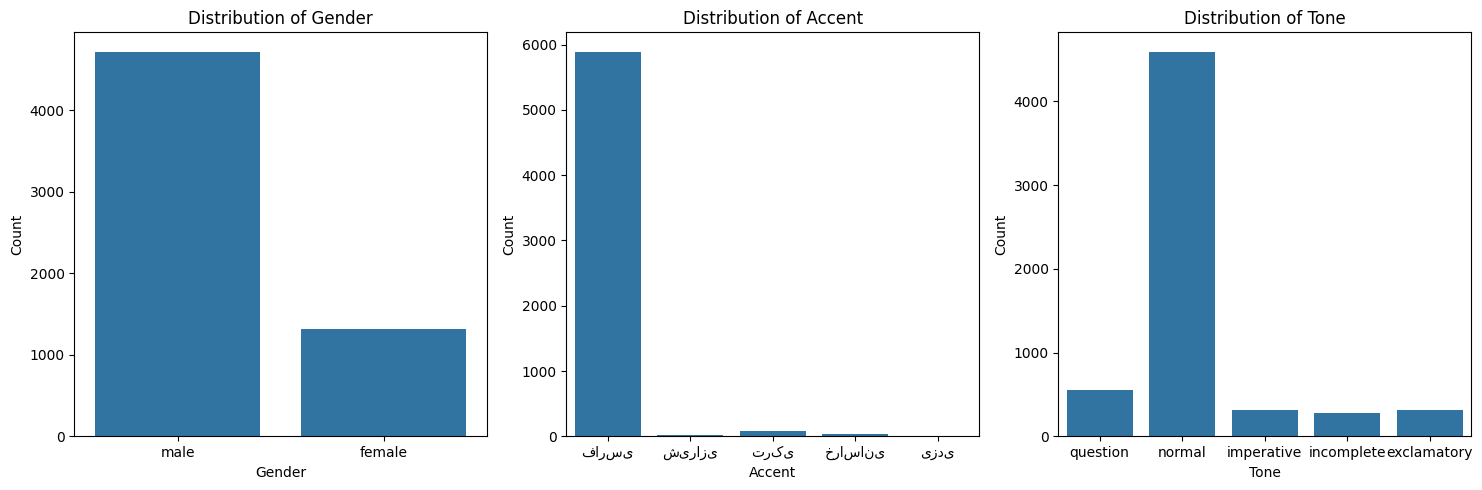

In [93]:
# Plotting the distribution of each feature
plt.figure(figsize=(5, 5))

# Distribution of Gender
plt.subplot(1, 3, 1)
sns.countplot(x='Gender', data=df)
plt.title("Distribution of Gender")
plt.xlabel("Gender")
plt.ylabel("Count")

# Distribution of Accent
plt.subplot(1, 3, 2)
sns.countplot(x='Accent', data=df)
plt.title("Distribution of Accent")
plt.xlabel("Accent")
plt.ylabel("Count")

# Distribution of Tone
plt.subplot(1, 3, 3)
sns.countplot(x='Tone', data=df)
plt.title("Distribution of Tone")
plt.xlabel("Tone")
plt.ylabel("Count")

plt.tight_layout()
plt.show()